In [3]:
pip install wordcloud


   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.4 kB ? eta -:--:--
   --- ----------------------------------- 30.7/301.4 kB 259.2 kB/s eta 0:00:02
   ----- --------------------------------- 41.0/301.4 kB 245.8 kB/s eta 0:00:02
   ----------- --------------------------- 92.2/301.4 kB 435.7 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/301.4 kB 479.3 kB/s eta 0:00:01
   --------------------- ---------------- 174.1/301.4 kB 581.0 kB/s eta 0:00:01
   ------------------------ ------------- 194.6/301.4 kB 588.9 kB/s eta 0:00:01
   ------------------------ ------------- 194.6/301.4 kB 588.9 kB/s eta 0:00:01
   ------------------------ ------------- 194.6/301.4 kB 588.9 kB/s eta 0:00:01
   ------------------------ ------------- 194.6/301.4 kB 588.9 kB/s eta 0:

## importing libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [9]:
df=pd.read_csv('yield_df.csv')
df.head()

Unnamed: 0     Area         Item  Year  hg/ha_yield  \
0           0  Albania        Maize  1990        36613   
1           1  Albania     Potatoes  1990        66667   
2           2  Albania  Rice, paddy  1990        23333   
3           3  Albania      Sorghum  1990        12500   
4           4  Albania     Soybeans  1990         7000   

   average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  
0                         1485.0              121.0     16.37  
1                         1485.0              121.0     16.37  
2                         1485.0              121.0     16.37  
3                         1485.0              121.0     16.37  
4                         1485.0              121.0     16.37

In [11]:
df.shape

(28242, 8)

In [13]:
df.tail()

Unnamed: 0      Area            Item  Year  hg/ha_yield  \
28237       28237  Zimbabwe     Rice, paddy  2013        22581   
28238       28238  Zimbabwe         Sorghum  2013         3066   
28239       28239  Zimbabwe        Soybeans  2013        13142   
28240       28240  Zimbabwe  Sweet potatoes  2013        22222   
28241       28241  Zimbabwe           Wheat  2013        22888   

       average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  
28237                          657.0            2550.07     19.76  
28238                          657.0            2550.07     19.76  
28239                          657.0            2550.07     19.76  
28240                          657.0            2550.07     19.76  
28241                          657.0            2550.07     19.76

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   hg/ha_yield                    28242 non-null  int64  
 5   average_rain_fall_mm_per_year  28242 non-null  float64
 6   pesticides_tonnes              28242 non-null  float64
 7   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ MB


In [17]:
df.describe().T

count          mean           std      min  \
Unnamed: 0                     28242.0  14120.500000   8152.907488     0.00   
Year                           28242.0   2001.544296      7.051905  1990.00   
hg/ha_yield                    28242.0  77053.332094  84956.612897    50.00   
average_rain_fall_mm_per_year  28242.0   1149.055980    709.812150    51.00   
pesticides_tonnes              28242.0  37076.909344  59958.784665     0.04   
avg_temp                       28242.0     20.542627      6.312051     1.30   

                                      25%       50%        75%        max  
Unnamed: 0                      7060.2500  14120.50   21180.75   28241.00  
Year                            1995.0000   2001.00    2008.00    2013.00  
hg/ha_yield                    19919.2500  38295.00  104676.75  501412.00  
average_rain_fall_mm_per_year    593.0000   1083.00    1668.00    3240.00  
pesticides_tonnes               1702.0000  17529.44   48687.88  367778.00  
avg_temp                          16.7025     21.51      26.00      30.65

<Axes: >

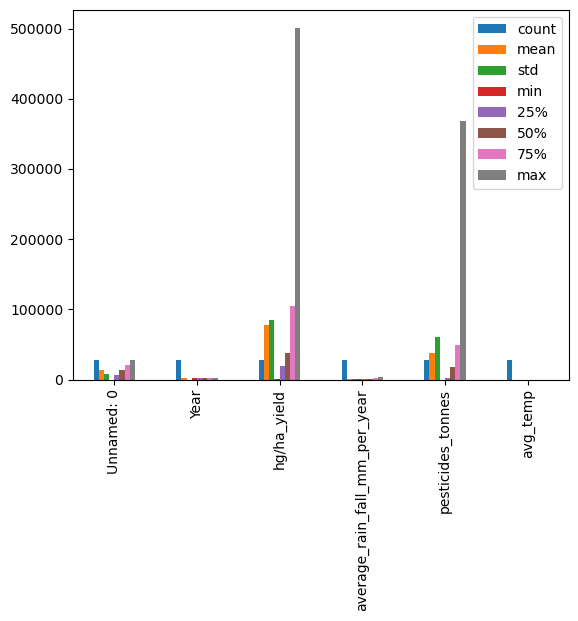

In [19]:
df.describe().T.plot(kind='bar')

In [21]:
df.isna().sum()

Unnamed: 0                       0
Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [23]:
df.duplicated().sum()

0

<Axes: >

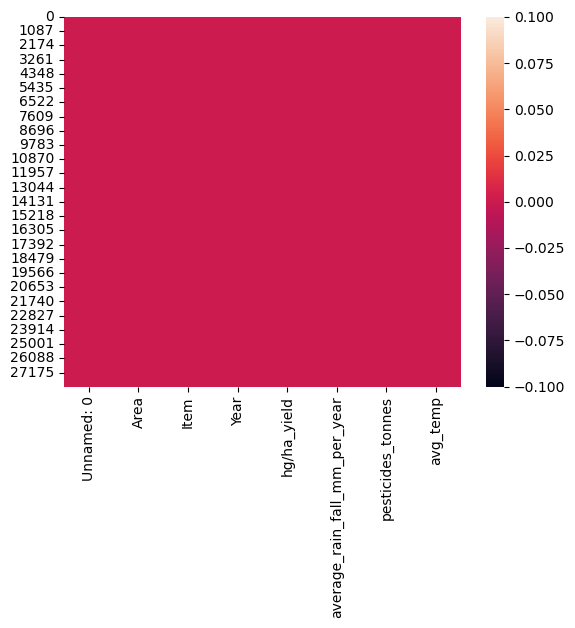

In [25]:
sns.heatmap(df.isna())

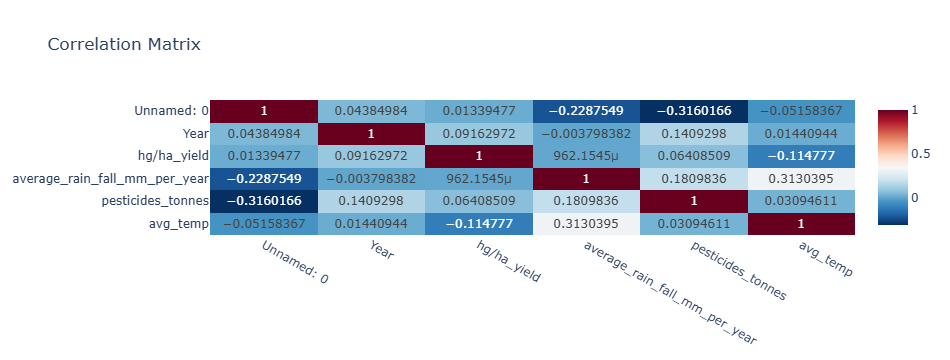

In [53]:
import plotly.express as px
import pandas as pd

# Assuming df is already defined
numeric_df = df.select_dtypes(include=[float, int])
correlation_matrix = numeric_df.corr()
fig = px.imshow(correlation_matrix, text_auto=True, aspect="auto",
                title='Correlation Matrix',
                color_continuous_scale='RdBu_r')
fig.show()

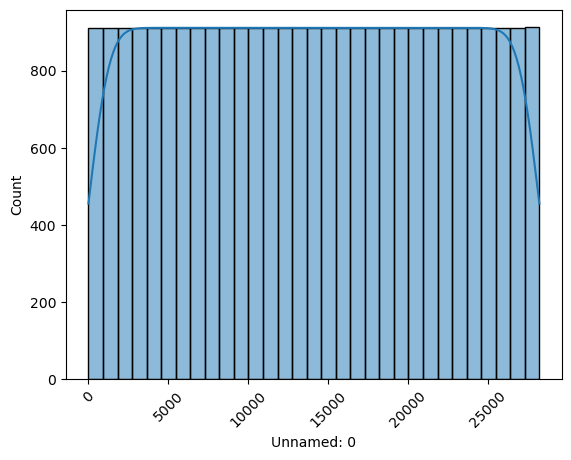

<Figure size 3000x2000 with 0 Axes>

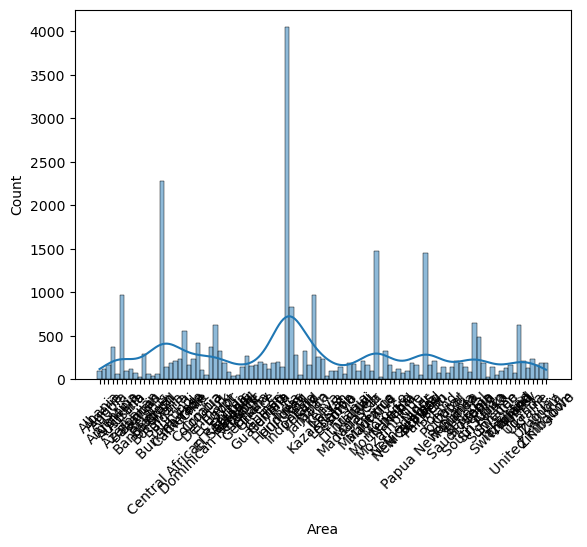

<Figure size 3000x2000 with 0 Axes>

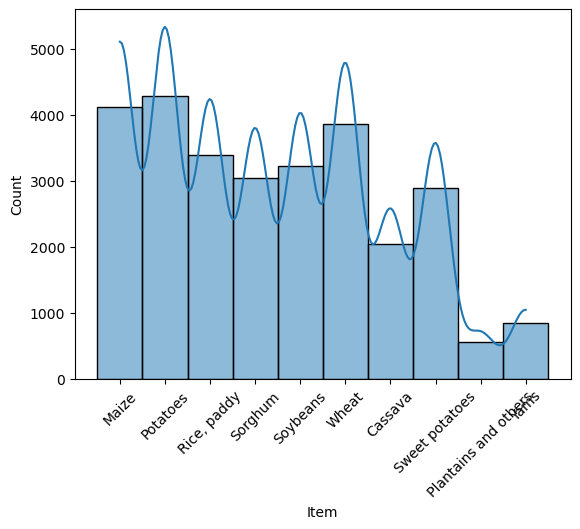

<Figure size 3000x2000 with 0 Axes>

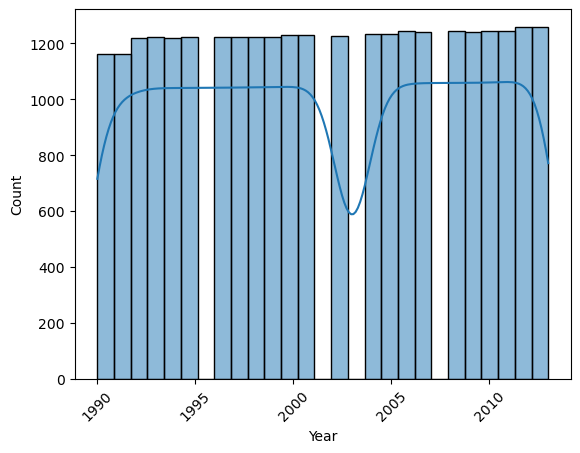

<Figure size 3000x2000 with 0 Axes>

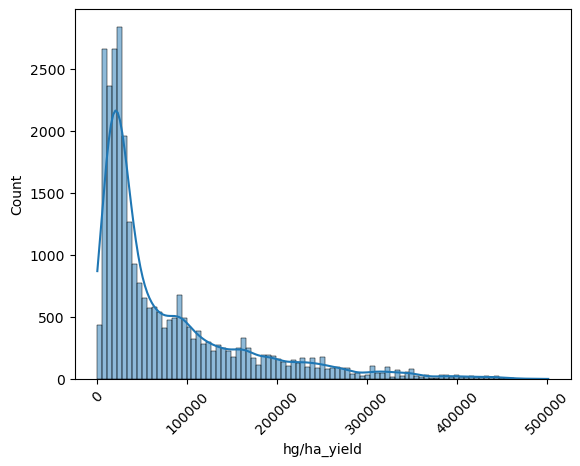

<Figure size 3000x2000 with 0 Axes>

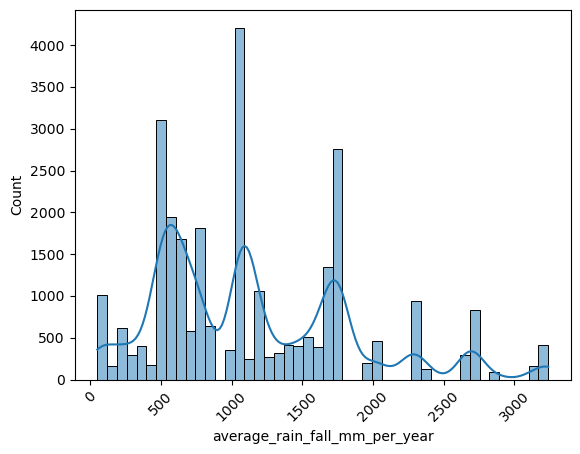

<Figure size 3000x2000 with 0 Axes>

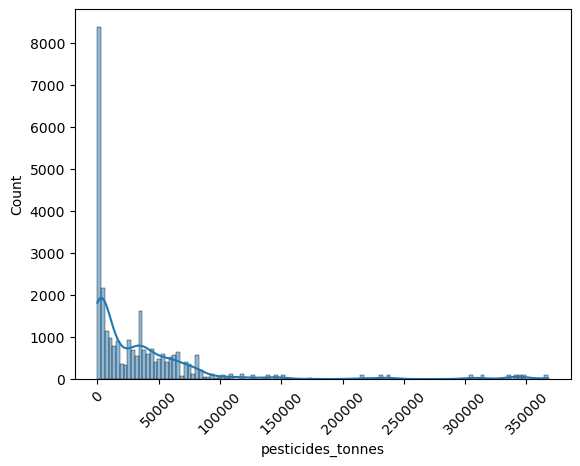

<Figure size 3000x2000 with 0 Axes>

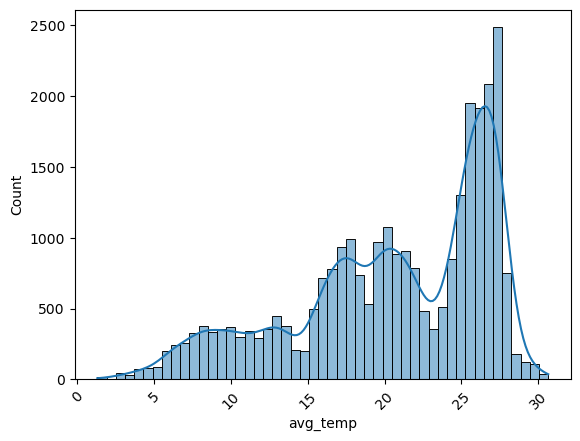

<Figure size 3000x2000 with 0 Axes>

In [63]:
for col in df:
    sns.histplot(x=col,data=df,kde=True)
    plt.xticks(rotation=45)
    plt.figure(figsize=(30, 20))
    plt.show()

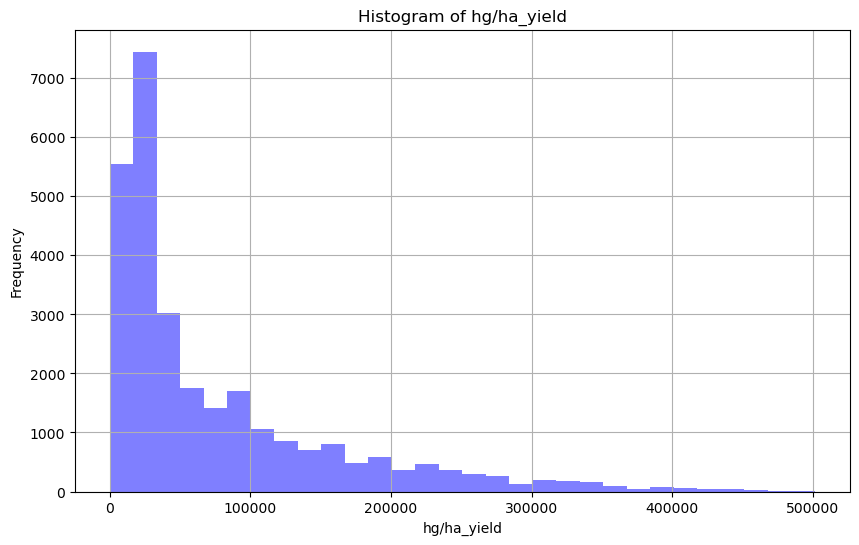

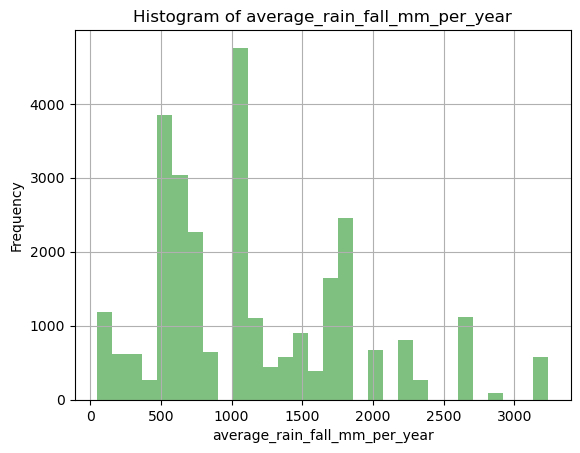

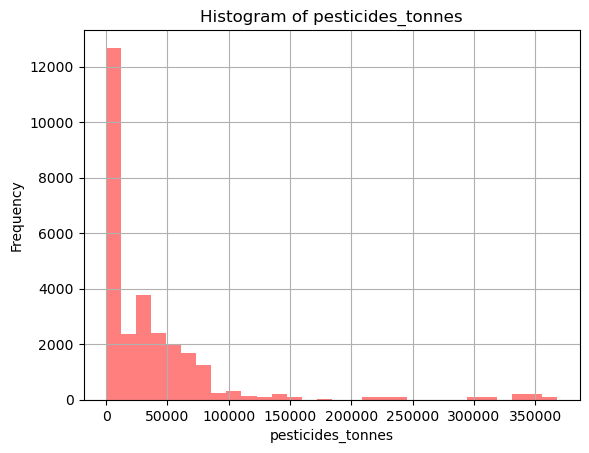

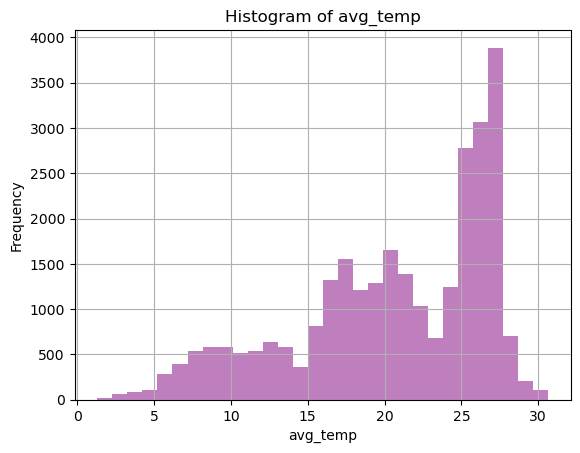

In [31]:
plt.figure(figsize=(10, 6))

# Histograms
df['hg/ha_yield'].hist(bins=30, alpha=0.5, color='blue')
plt.title('Histogram of hg/ha_yield')
plt.xlabel('hg/ha_yield')
plt.ylabel('Frequency')
plt.show()




df['average_rain_fall_mm_per_year'].hist(bins=30, alpha=0.5, color='green')
plt.title('Histogram of average_rain_fall_mm_per_year')
plt.xlabel('average_rain_fall_mm_per_year')
plt.ylabel('Frequency')
plt.show()




df['pesticides_tonnes'].hist(bins=30, alpha=0.5, color='red')
plt.title('Histogram of pesticides_tonnes')
plt.xlabel('pesticides_tonnes')
plt.ylabel('Frequency')
plt.show()


df['avg_temp'].hist(bins=30, alpha=0.5, color='purple')
plt.title('Histogram of avg_temp')
plt.xlabel('avg_temp')
plt.ylabel('Frequency')
plt.show()

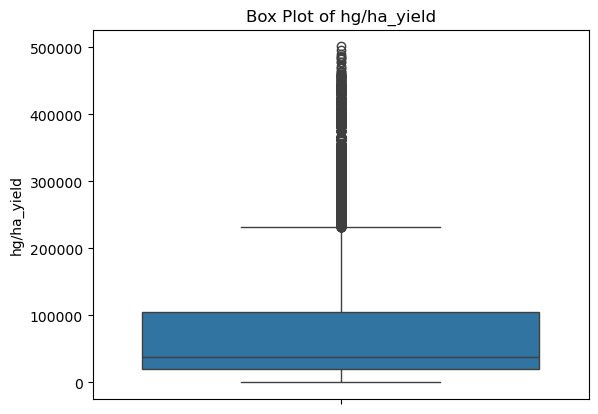

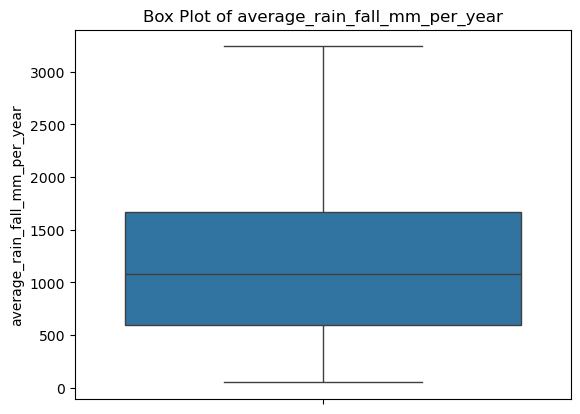

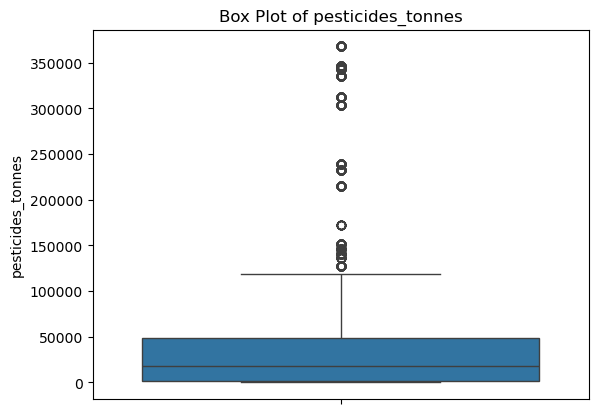

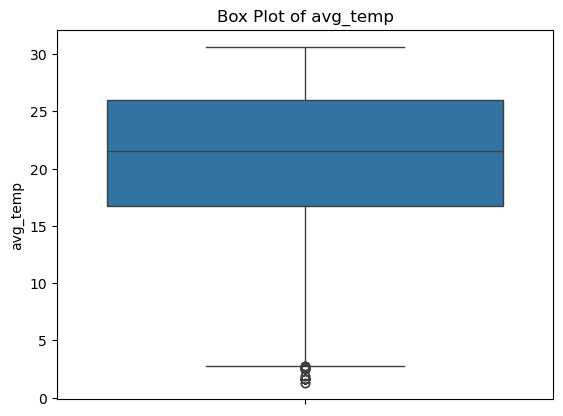

In [33]:
# Box Plots
sns.boxplot(data=df['hg/ha_yield'])
plt.title('Box Plot of hg/ha_yield')
plt.show()

sns.boxplot(data=df['average_rain_fall_mm_per_year'])
plt.title('Box Plot of average_rain_fall_mm_per_year')
plt.show()

sns.boxplot(data=df['pesticides_tonnes'])
plt.title('Box Plot of pesticides_tonnes')
plt.show()

sns.boxplot(data=df['avg_temp'])
plt.title('Box Plot of avg_temp')
plt.show()

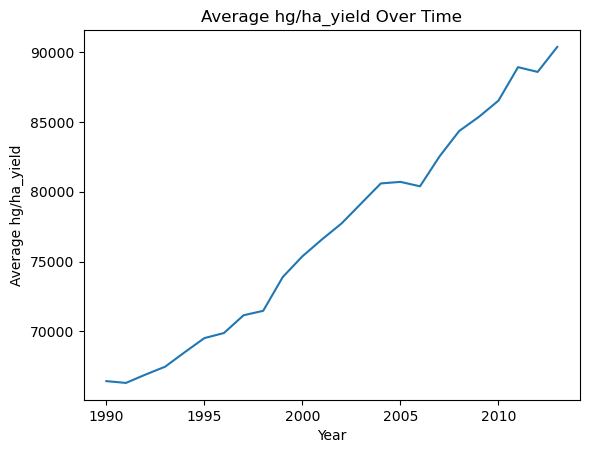

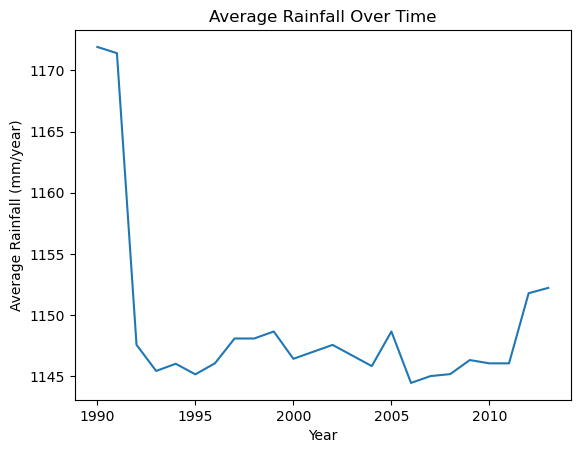

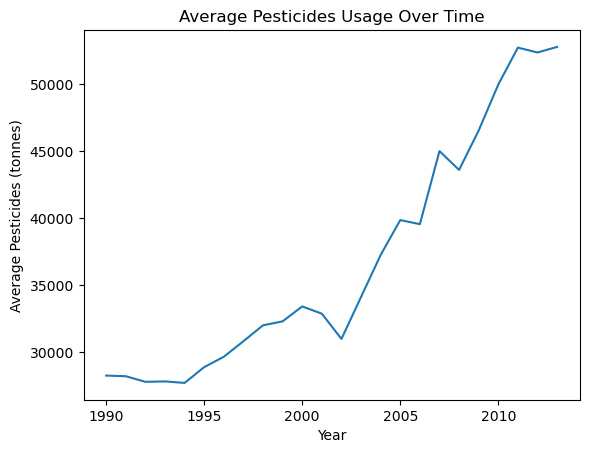

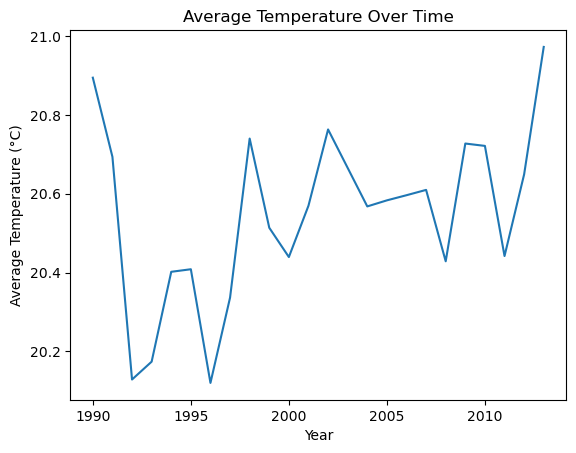

In [35]:
# Time Series Analysis
df.groupby('Year')['hg/ha_yield'].mean().plot()
plt.title('Average hg/ha_yield Over Time')
plt.xlabel('Year')
plt.ylabel('Average hg/ha_yield')
plt.show()

df.groupby('Year')['average_rain_fall_mm_per_year'].mean().plot()
plt.title('Average Rainfall Over Time')
plt.xlabel('Year')
plt.ylabel('Average Rainfall (mm/year)')
plt.show()
df.groupby('Year')['pesticides_tonnes'].mean().plot()
plt.title('Average Pesticides Usage Over Time')
plt.xlabel('Year')
plt.ylabel('Average Pesticides (tonnes)')
plt.show()

df.groupby('Year')['avg_temp'].mean().plot()
plt.title('Average Temperature Over Time')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.show()

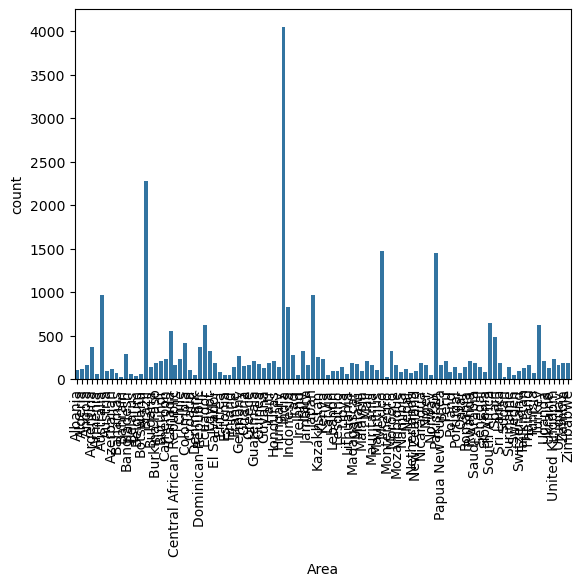

<Figure size 1500x500 with 0 Axes>

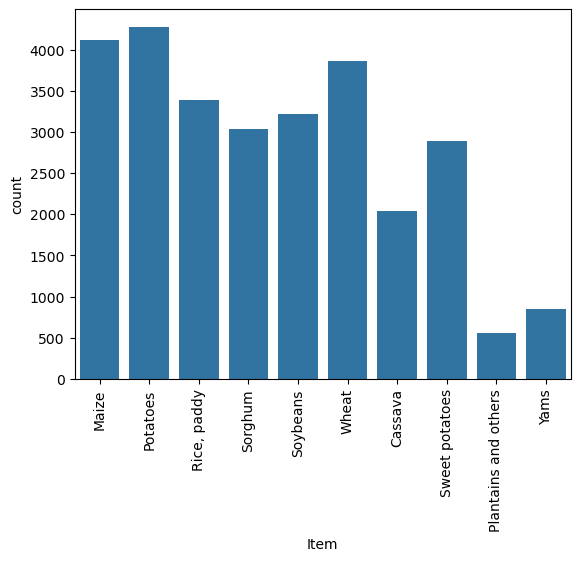

<Figure size 1500x500 with 0 Axes>

In [83]:
for col in df:
    if df[col].dtype == 'O':
        sns.countplot(x=col,data=df)
        plt.xticks(rotation=90)
        plt.figure(figsize=(15,5))
        plt.show()

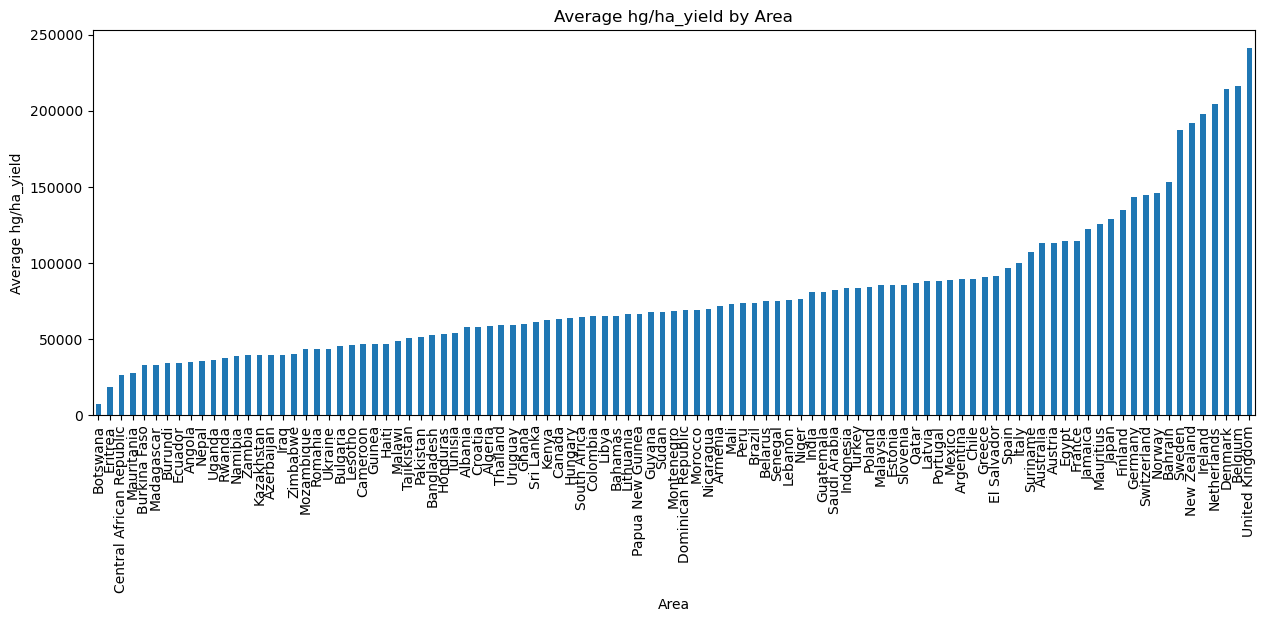

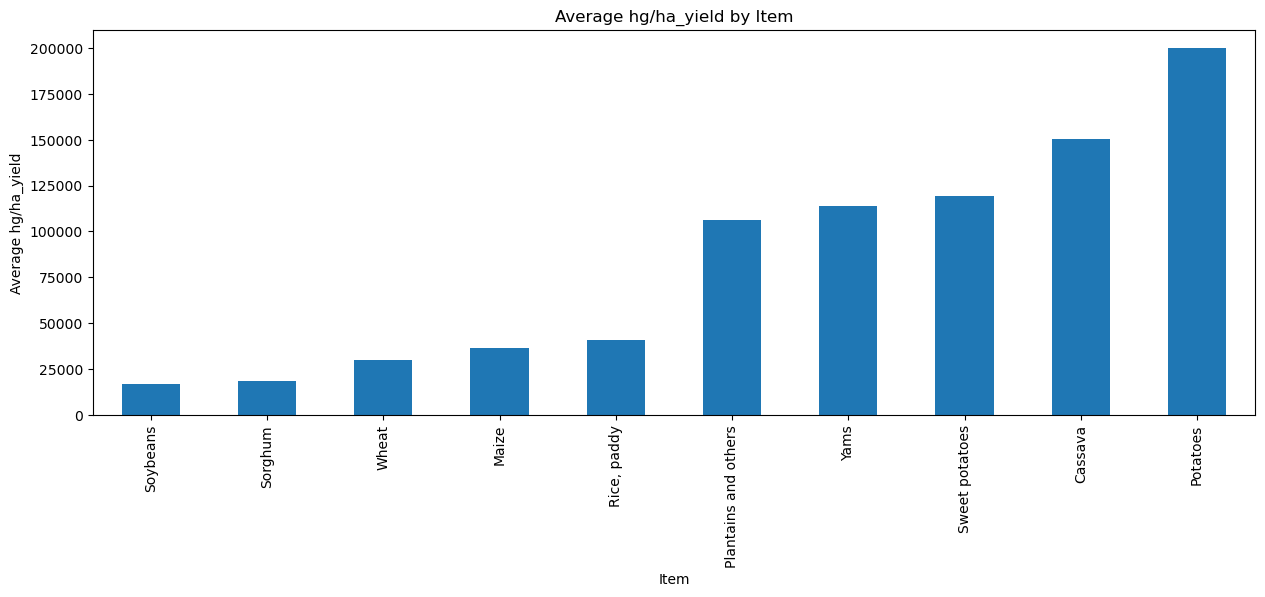

In [39]:
# Comparisons
df.groupby('Area')['hg/ha_yield'].mean().sort_values().plot(kind='bar', figsize=(15, 5))
plt.title('Average hg/ha_yield by Area')
plt.xlabel('Area')
plt.ylabel('Average hg/ha_yield')
plt.show()

df.groupby('Item')['hg/ha_yield'].mean().sort_values().plot(kind='bar', figsize=(15, 5))
plt.title('Average hg/ha_yield by Item')
plt.xlabel('Item')
plt.ylabel('Average hg/ha_yield')
plt.show()

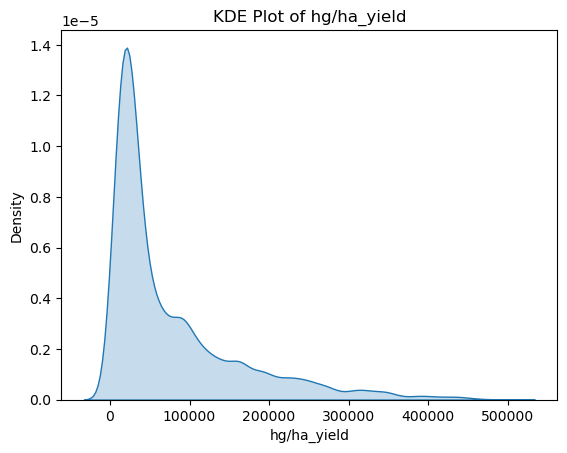

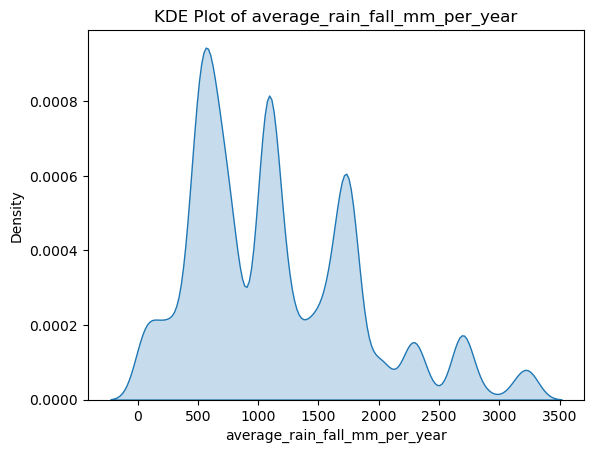

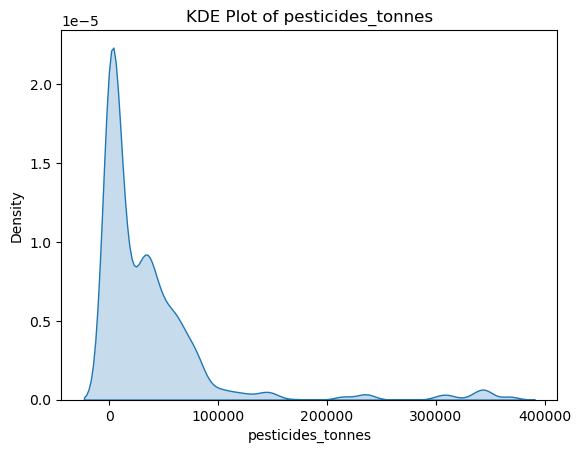

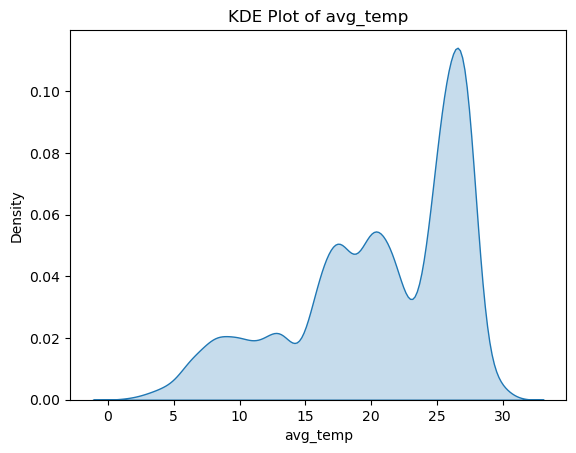

In [41]:
# Distribution Plots
sns.kdeplot(df['hg/ha_yield'], shade=True)
plt.title('KDE Plot of hg/ha_yield')
plt.show()

sns.kdeplot(df['average_rain_fall_mm_per_year'], shade=True)
plt.title('KDE Plot of average_rain_fall_mm_per_year')
plt.show()

sns.kdeplot(df['pesticides_tonnes'], shade=True)
plt.title('KDE Plot of pesticides_tonnes')
plt.show()

sns.kdeplot(df['avg_temp'], shade=True)
plt.title('KDE Plot of avg_temp')
plt.show()

In [43]:
df.columns.tolist()

['Unnamed: 0',
 'Area',
 'Item',
 'Year',
 'hg/ha_yield',
 'average_rain_fall_mm_per_year',
 'pesticides_tonnes',
 'avg_temp']

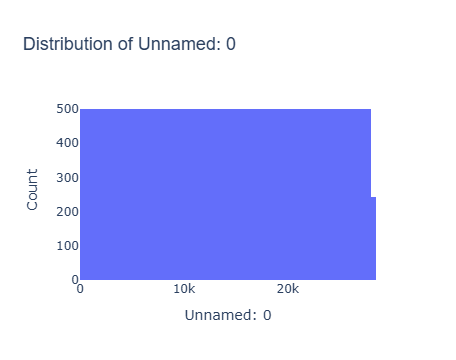

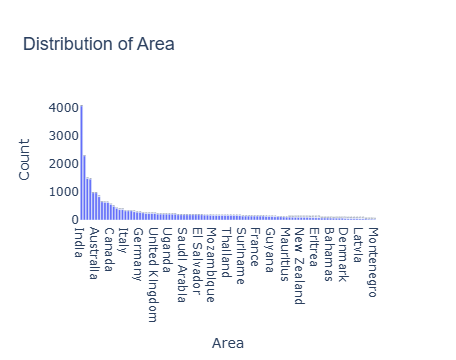

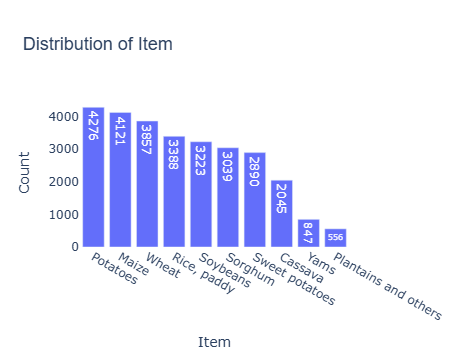

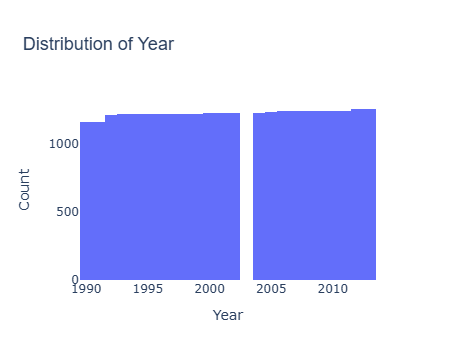

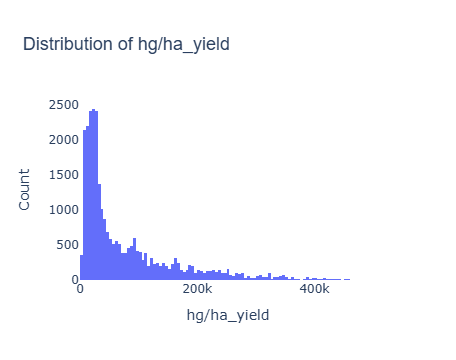

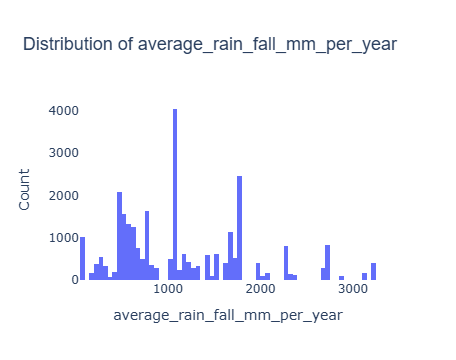

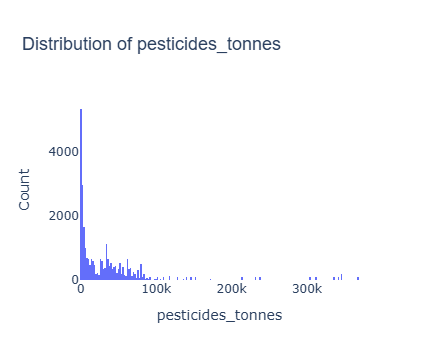

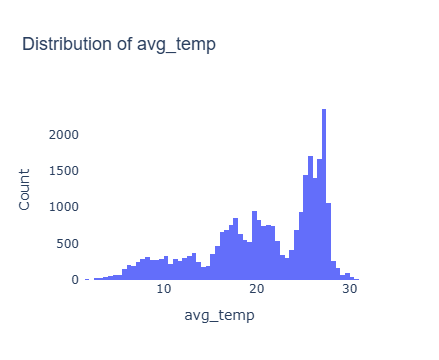

In [45]:
import plotly.express as px
import pandas as pd

# Assuming df is already defined and contains the data

# Define the columns you want to plot
columns = ['Unnamed: 0',
 'Area',
 'Item',
 'Year',
 'hg/ha_yield',
 'average_rain_fall_mm_per_year',
 'pesticides_tonnes',
 'avg_temp']
# Iterate through each column and create a bar chart or histogram
for column in columns:
    try:
        if column not in df.columns:
            print(f"Column {column} does not exist in the DataFrame")
            continue
        
        # Check if the column is suitable for a bar chart (categorical data)
        if df[column].dtype == 'object' or df[column].dtype.name == 'category':
            # Count the occurrences of each unique value
            column_counts = df[column].value_counts().reset_index()
            column_counts.columns = [column, 'count']
             # Create a bar chart using plotly.express
            fig = px.bar(
                column_counts,
                x=column,
                y='count',
                title=f'Distribution of {column}',
                labels={column: column, 'count': 'Count'},
                text='count'
            )
            # Update layout for better readability
            fig.update_layout(
                xaxis_title=column,
                yaxis_title='Count',
                paper_bgcolor='rgba(0,0,0,0)',
                plot_bgcolor='rgba(0,0,0,0)',
                title_font=dict(size=18, family="Arial"),
                xaxis={'categoryorder': 'total descending'}
            )
             # Show the figure
            fig.show()

        # For numerical data
        elif df[column].dtype in ['int64', 'float64']:
            # Create a histogram for numerical columns
            fig = px.histogram(
                df,
                x=column,
                title=f'Distribution of {column}',
                labels={column: column, 'count': 'Count'}
            )
             # Update layout for better readability
            fig.update_layout(
                xaxis_title=column,
                yaxis_title='Count',
                paper_bgcolor='rgba(0,0,0,0)',
                plot_bgcolor='rgba(0,0,0,0)',
                title_font=dict(size=18, family="Arial")
            )
            
            # Show the figure
            fig.show()
    
    except Exception as e:
        print(f"Could not create plot for column {column}: {e}")

In [47]:
df

Unnamed: 0      Area            Item  Year  hg/ha_yield  \
0               0   Albania           Maize  1990        36613   
1               1   Albania        Potatoes  1990        66667   
2               2   Albania     Rice, paddy  1990        23333   
3               3   Albania         Sorghum  1990        12500   
4               4   Albania        Soybeans  1990         7000   
...           ...       ...             ...   ...          ...   
28237       28237  Zimbabwe     Rice, paddy  2013        22581   
28238       28238  Zimbabwe         Sorghum  2013         3066   
28239       28239  Zimbabwe        Soybeans  2013        13142   
28240       28240  Zimbabwe  Sweet potatoes  2013        22222   
28241       28241  Zimbabwe           Wheat  2013        22888   

       average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  
0                             1485.0             121.00     16.37  
1                             1485.0             121.00     16.37  
2                             1485.0             121.00     16.37  
3                             1485.0             121.00     16.37  
4                             1485.0             121.00     16.37  
...                              ...                ...       ...  
28237                          657.0            2550.07     19.76  
28238                          657.0            2550.07     19.76  
28239                          657.0            2550.07     19.76  
28240                          657.0            2550.07     19.76  
28241                          657.0            2550.07     19.76  

[28242 rows x 8 columns]

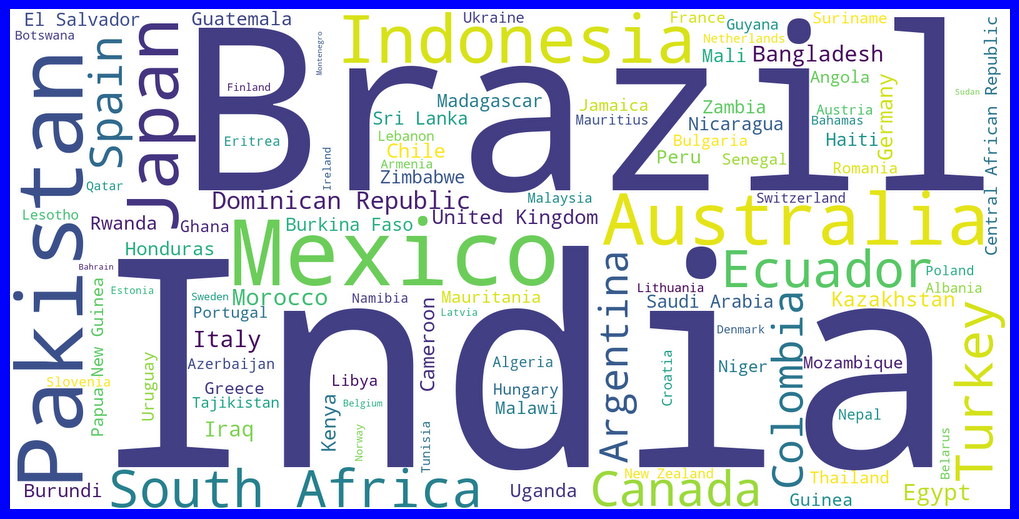

In [99]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import pandas as pd

# Assuming `dataset` is your DataFrame and `stop_words_list` is a list of stopwords

# Example stopwords list, modify as needed
stop_words_list = set(STOPWORDS)

# Generate frequency counts from the 'business_category' column
counts = Counter(df["Area"].dropna().apply(lambda x: str(x)))

# Generate the word cloud
wcc = WordCloud(
    background_color="white",
    width=1600, height=800,
    max_words=2000,
    stopwords=stop_words_list
    )
wcc.generate_from_frequencies(counts)

# Display the word cloud
plt.figure(figsize=(10, 5), facecolor='b')
plt.imshow(wcc, interpolation='lanczos')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
